Aim: To predict the price of the car, using various features provided in the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
pd.set_option('display.max_columns' , None)
pd.options.display.max_rows=100

**EDA**

Car Dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [4]:
car_dataset = pd.read_csv('D:/BATCH_25/project_batch25/ppt_linear_reg/car_dataset/car data.csv') # loading the data from csv file to pandas dataframe

In [5]:
car_dataset.head(100) # inspecting the first 5 rows of the dataframe

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
car_dataset.shape # checking the number of rows and columns

(301, 9)

In [6]:
car_dataset.info() # getting some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


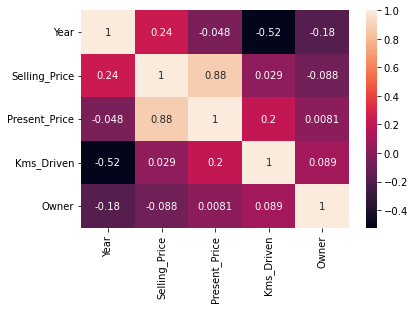

In [7]:
sns.heatmap(car_dataset.corr(),annot=True)
plt.show()

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


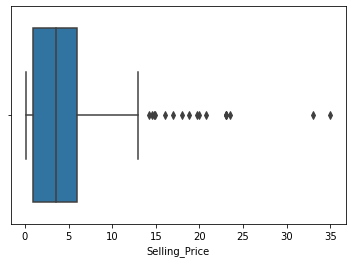

In [8]:
sns.boxplot(car_dataset['Selling_Price'])
plt.show()

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


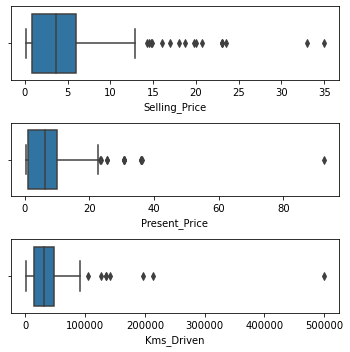

In [9]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(car_dataset['Selling_Price'], ax = axs[0])
plt2 = sns.boxplot(car_dataset['Present_Price'], ax = axs[1])
plt3 = sns.boxplot(car_dataset['Kms_Driven'], ax = axs[2])
plt.tight_layout()

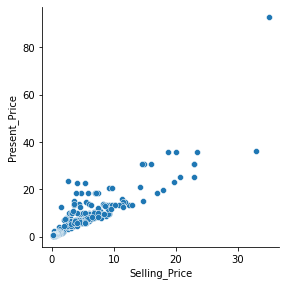

In [10]:
sns.pairplot(car_dataset, x_vars=[ 'Selling_Price'], y_vars='Present_Price', height=4, aspect=1, kind='scatter')
plt.show()

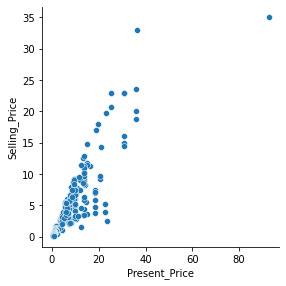

In [11]:
sns.pairplot(car_dataset, x_vars=[ 'Present_Price'], y_vars='Selling_Price', height=4, aspect=1, kind='scatter')
plt.show()

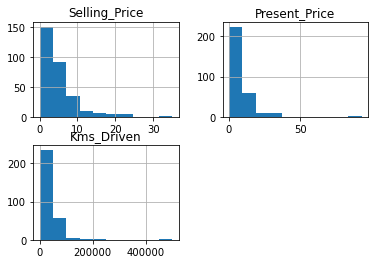

In [12]:
car_dataset[['Selling_Price','Present_Price','Kms_Driven']].hist()
plt.show()

In [13]:
car_dataset.isnull().sum() # checking the number of missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Owner.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


**Encoding**

In [15]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [16]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


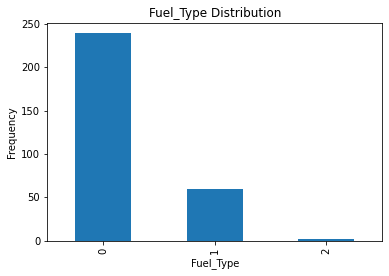

In [17]:
car_dataset.Fuel_Type.value_counts().plot(kind='bar')

plt.ylabel('Frequency')
plt.xlabel('Fuel_Type')

plt.title('Fuel_Type Distribution')

plt.show()

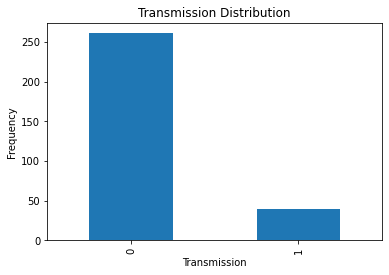

In [18]:
car_dataset.Transmission.value_counts().plot(kind='bar')

plt.ylabel('Frequency')
plt.xlabel('Transmission')

plt.title('Transmission Distribution')

plt.show()

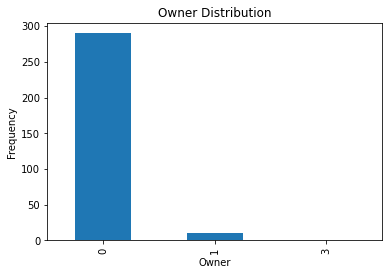

In [19]:
car_dataset.Owner.value_counts().plot(kind='bar')

plt.ylabel('Frequency')
plt.xlabel('Owner')

plt.title('Owner Distribution')

plt.show()

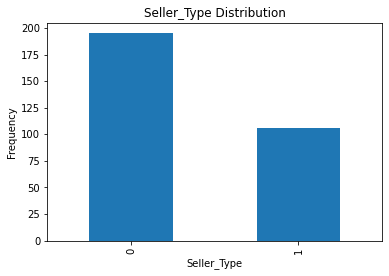

In [20]:
car_dataset.Seller_Type.value_counts().plot(kind='bar')

plt.ylabel('Frequency')
plt.xlabel('Seller_Type')

plt.title('Seller_Type Distribution')

plt.show()

Splitting the data and Target

In [21]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [22]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [23]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

**Model** **Training**

1. Linear Regression

In [25]:
lr = LinearRegression() # loading the linear regression model

In [26]:
lr.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [27]:
training_data_prediction = lr.predict(X_train) # prediction on Training data

In [28]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_train, training_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.8799451660493698
Mean Absolute Error :  1.2166174093912014
Mean squared error :  3.2590308233091223
Root Mean squared error :  1.8052785999144625


Visualize the actual prices and Predicted prices

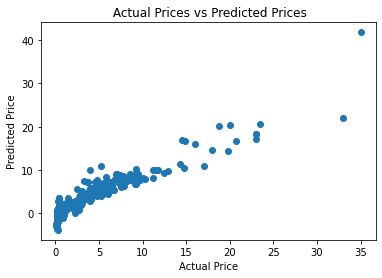

In [29]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [30]:
# prediction on Training data
test_data_prediction = lr.predict(X_test)

In [31]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_test, test_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.8365766715026905
Mean Absolute Error :  1.1516382156614553
Mean squared error :  2.1501299189838208
Root Mean squared error :  1.466332131198052


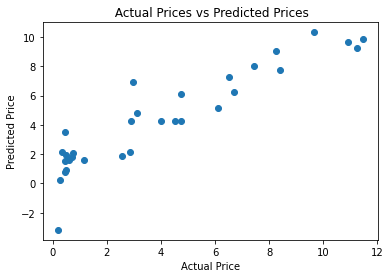

In [32]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

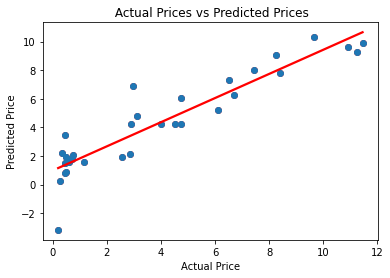

In [33]:
sns.regplot(x=Y_test,y= test_data_prediction,ci=None,color='r');
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [34]:
lass_reg_model = Lasso() # loading the linear regression model

In [35]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

**Model** **Evaluation**

In [36]:
training_data_prediction = lass_reg_model.predict(X_train) # prediction on Training data

In [37]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_train, training_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.8427856123435794
Mean Absolute Error :  1.2863097696916528
Mean squared error :  4.267770970810244
Root Mean squared error :  2.065858410155508


Visualize the actual prices and Predicted prices

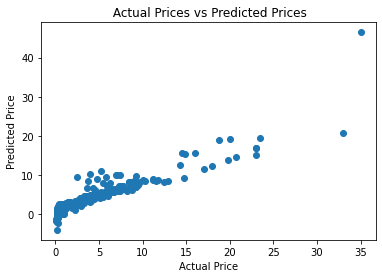

In [38]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [39]:
test_data_prediction = lass_reg_model.predict(X_test) # prediction on Training data

In [40]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_test, test_data_prediction)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.8709167941173195
Mean Absolute Error :  1.0507413774170433
Mean squared error :  1.6983234006965484
Root Mean squared error :  1.3031973759552113


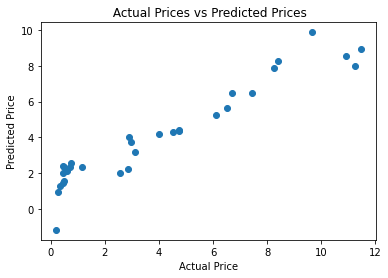

In [41]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

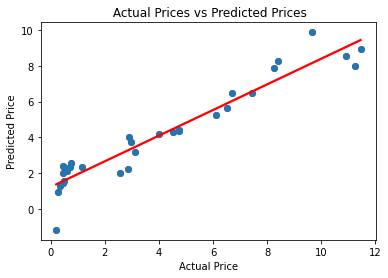

In [42]:
sns.regplot(x=Y_test,y= test_data_prediction,ci=None,color='r');

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()